# Collecting Banana's with Unity ML-Agents

---

### 1. Start the Environment

We begin by importing some necessary packages.  If any error chech the Readme.md

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import random
from collections import deque
from dqn_agent import Agent
import matplotlib.pyplot as plt

%matplotlib inline

Next, we will start the environment!

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Train the agent to pick up yellow bananas


In [5]:
def get_reward(brain_info, agent_index=0):
    return brain_info.rewards[agent_index]

def get_state(brain_info, agent_index=0):
    return brain_info.vector_observations[agent_index] 

def is_done(brain_info, agent_index=0):
    return brain_info.local_done[agent_index]

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, solve_score=13.0):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    
    for i_episode in range(1, n_episodes+1):
        brain_info = env.reset(train_mode=True)[brain_name]
        state = get_state(brain_info)
        score = 0
        
        for t in range(max_t):
            action = agent.act(state, eps)
            brain_info = env.step(action)[brain_name]
            next_state = get_state(brain_info)
            reward = get_reward(brain_info)
            done = is_done(brain_info)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
                
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        mean_score = np.mean(scores_window) #calculate the mean score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        #print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        print(f'\rEpisode {i_episode}' f'\tAverage score over the last 100 episodes: {mean_score:.2f}', end="")
        
        if i_episode % 100 == 0:
            #print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            print(f'\rEpisode {i_episode}' f'\tAverage score over the last 100 episodes: {mean_score:.2f}')
            
        if mean_score>=solve_score:
            #print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            print(f'\nEnvironment solved in {i_episode:d} episodes!' f'\tAverage score over the last 100 episodes: {mean_score:.2f}')
            
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
            
    return scores

agent = Agent(state_size=state_size, action_size=action_size, seed=0)
scores = dqn()

Episode 100	Average score over the last 100 episodes: 1.41
Episode 200	Average score over the last 100 episodes: 5.17
Episode 300	Average score over the last 100 episodes: 9.25
Episode 400	Average score over the last 100 episodes: 10.31
Episode 500	Average score over the last 100 episodes: 12.05
Episode 546	Average score over the last 100 episodes: 13.06
Environment solved in 546 episodes!	Average score over the last 100 episodes: 13.06


### 4 Plot the results

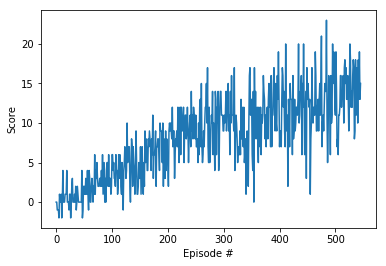

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5 Agent in action

In [7]:
# load the weights from checkpoint.pth file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
for i in range(5):
    brain_info = env.reset(train_mode=False)[brain_name]
    for j in range(200):
        state = get_state(brain_info)
        action = agent.act(state)
        brain_info = env.step(action)[brain_name]
        done = is_done(brain_info)
        if done:
            break

### 6 Stop the environment

In [8]:
env.close()